In [2]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns

/Users/shubham/shubham/bayesian_stats/kruschke/.env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [6]:
df = pd.read_csv('../data/TherapeuticTouchData.csv', dtype={'s': 'category'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 2 columns):
y    280 non-null int64
s    280 non-null category
dtypes: category(1), int64(1)
memory usage: 2.8 KB


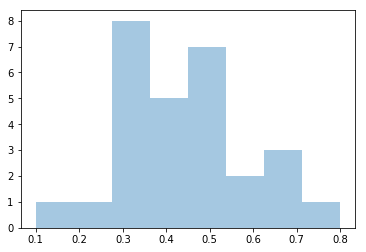

In [18]:
proportions = df.groupby('s').apply(lambda x: x.sum()/len(x))
sns.distplot(proportions, bins=8, kde=False)

We will now implement the following model:

![Model](./images/fig9_7.png)

In [24]:
practitioner_idx = df.s.cat.codes.values
practitioner_codes = df.s.cat.categories
n_practitioners = practitioner_codes.size

In [51]:
with pm.Model() as model:
    
    omega = pm.Beta('omega', 1., 1.)
    kappa_minus_2 = pm.Gamma('kappa_minus_2', 0.01, 0.01)
    kappa = pm.Deterministic('kappa', kappa_minus_2 + 2)
    
    theta = pm.Beta(
        'theta', 
        alpha=omega*(kappa-2)+1, 
        beta=(1-omega)*(kappa-2)+1,
        shape=n_practitioners
    )
    
    y = pm.Bernoulli('y', theta[practitioner_idx], observed=df.y)

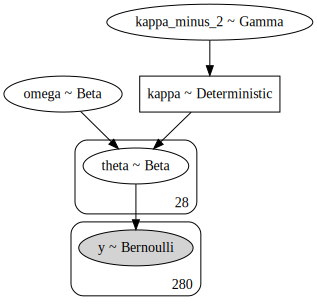

In [38]:
pm.model_to_graphviz(model)

In [52]:
with model:
    trace = pm.sample(5000, cores=-1, nuts_kwargs={'target_accept': 0.95})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta, kappa_minus_2, omega]
100%|██████████| 5500/5500 [00:21<00:00, 256.57it/s]
The number of effective samples is smaller than 10% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131328630>,
      dtype=object)

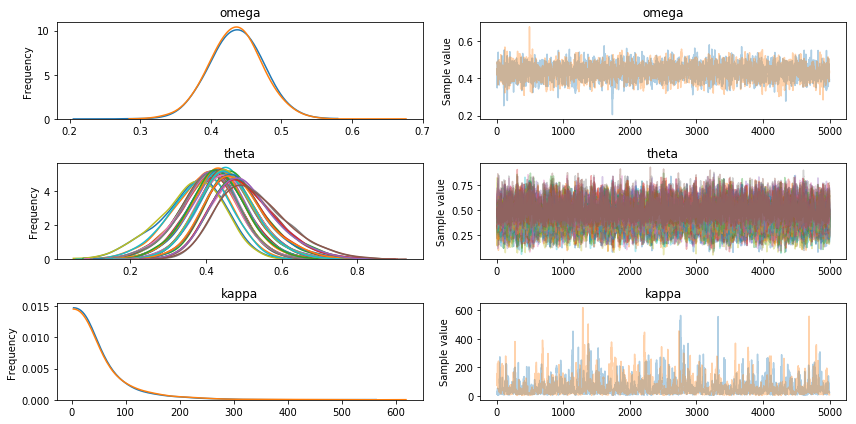

In [41]:
pm.traceplot(trace, ['omega', 'theta', 'kappa'])

In [42]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
omega,0.436022,0.037358,0.000644,0.363775,0.509555,2954.139204,1.000129
kappa_minus_2,54.380780,56.787720,1.848849,1.366384,164.921031,826.994058,1.000388
kappa,56.380780,56.787720,1.848849,3.366384,166.921031,826.994058,1.000388
theta__0,0.360938,0.087717,0.001687,0.178005,0.519882,2435.677982,1.000442
theta__1,0.384768,0.081424,0.001499,0.211377,0.531916,3106.461266,1.000066
theta__2,0.407945,0.079295,0.001034,0.249521,0.568588,5527.775765,0.999902
theta__3,0.406678,0.080604,0.001023,0.241665,0.565027,6356.107086,0.999995
theta__4,0.407134,0.078460,0.001065,0.251246,0.563078,5965.505912,0.999970
theta__5,0.407948,0.080125,0.000974,0.245193,0.567690,6089.976703,0.999950
theta__6,0.408256,0.079858,0.000983,0.252334,0.575664,6287.957727,1.000318


In [44]:
from matplotlib import gridspec


Marginal posterior distributions

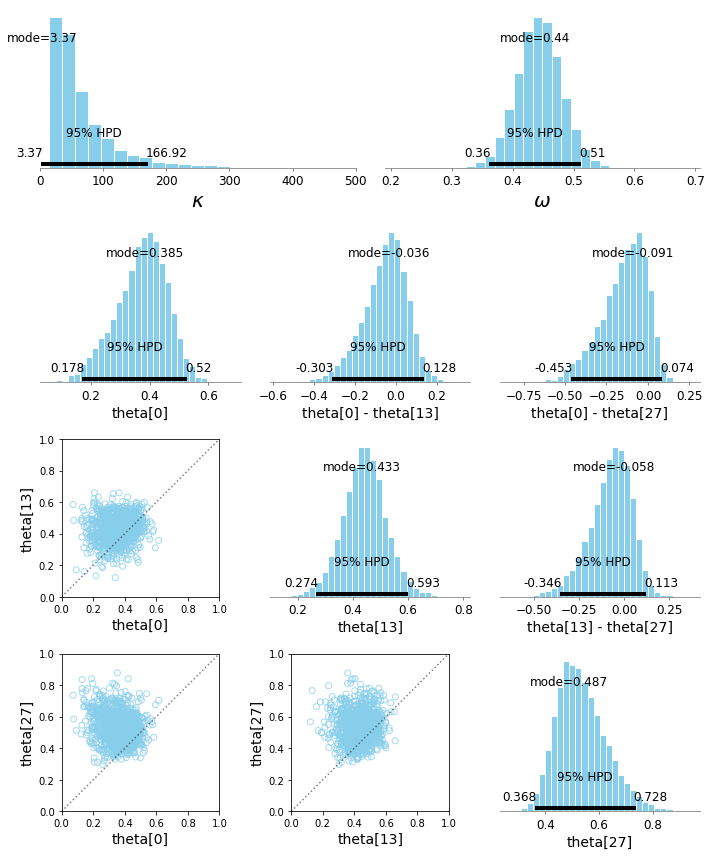

In [46]:
plt.figure(figsize=(10,12))
color = '#87ceeb'

# Define gridspec
gs = gridspec.GridSpec(4, 6)
ax1 = plt.subplot(gs[0,:3])
ax2 = plt.subplot(gs[0,3:])
ax3 = plt.subplot(gs[1,:2])
ax4 = plt.subplot(gs[1,2:4])
ax5 = plt.subplot(gs[1,4:6])
ax6 = plt.subplot(gs[2,:2])                     
ax7 = plt.subplot(gs[2,2:4])
ax8 = plt.subplot(gs[2,4:6])
ax9 = plt.subplot(gs[3,:2])
ax10 = plt.subplot(gs[3,2:4])
ax11 = plt.subplot(gs[3,4:6])

# thetas and theta pairs to plot
thetas = (0, 13, 27)
theta_pairs = ((0,13),(0,27),(13,27))

font_d = {'size':14}

# kappa & omega posterior plots
for var, ax in zip(['kappa', 'omega'], [ax1, ax2]):
    pm.plot_posterior(trace[var], point_estimate='mode', ax=ax, color=color, round_to=2)
    ax.set_xlabel('$\{}$'.format(var), fontdict={'size':20, 'weight':'bold'})
ax1.set(xlim=(0,500))

# theta posterior plots
for var, ax in zip(thetas,[ax3, ax7, ax11]):
    pm.plot_posterior(trace['theta'][:,var], point_estimate='mode', ax=ax, color=color)
    ax.set_xlabel('theta[{}]'.format(var), fontdict=font_d)

# theta scatter plots
for var, ax in zip(theta_pairs,[ax6, ax9, ax10]):
    ax.scatter(trace['theta'][::10,var[0]], trace['theta'][::10,var[1]], alpha=0.75, color=color, facecolor='none')
    ax.plot([0, 1], [0, 1], ':k', transform=ax.transAxes, alpha=0.5)
    ax.set_xlabel('theta[{}]'.format(var[0]), fontdict=font_d)
    ax.set_ylabel('theta[{}]'.format(var[1]), fontdict=font_d)
    ax.set(xlim=(0,1), ylim=(0,1), aspect='equal')

# theta posterior differences plots
for var, ax in zip(theta_pairs,[ax4, ax5, ax8]):
    pm.plot_posterior(trace['theta'][:,var[0]]-trace['theta'][:,var[1]], point_estimate='mode', ax=ax, color=color)
    ax.set_xlabel('theta[{}] - theta[{}]'.format(*var), fontdict=font_d)

plt.tight_layout()

### Shrinkage

Now, we will create a model with just theta estimations per individual, with no higher level distribution.

In [53]:
with pm.Model() as unpooled_model:
    
    theta = pm.Beta('theta', 1, 1, shape=n_practitioners)
    
    y = pm.Bernoulli('y', theta[practitioner_idx], observed=df.y)
    

In [54]:
with unpooled_model:
    unpooled_trace = pm.sample(
        5000, 
        cores=-1, 
        nuts_kwargs={'target_accept': 0.95}
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
100%|██████████| 5500/5500 [00:09<00:00, 593.28it/s]


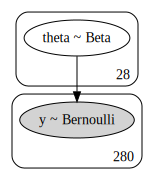

In [55]:
pm.model_to_graphviz(unpooled_model)

In [69]:
df_shrinkage = pd.concat(
    [
        pm.summary(unpooled_trace).iloc[:, 0], 
        pm.summary(trace).iloc[3:, 0]
    ], 
    axis=1
).reset_index()

df_shrinkage.columns = ['theta', 'unpooled', 'hierarchical']
df_shrinkage = pd.melt(
    df_shrinkage, 
    'theta', 
    ['unpooled', 'hierarchical'], 
    var_name='Model'
)
df_shrinkage.head()

,theta,Model,value
0,theta__0,unpooled,0.168817
1,theta__1,unpooled,0.249905
2,theta__2,unpooled,0.334211
3,theta__3,unpooled,0.335046
4,theta__4,unpooled,0.333318


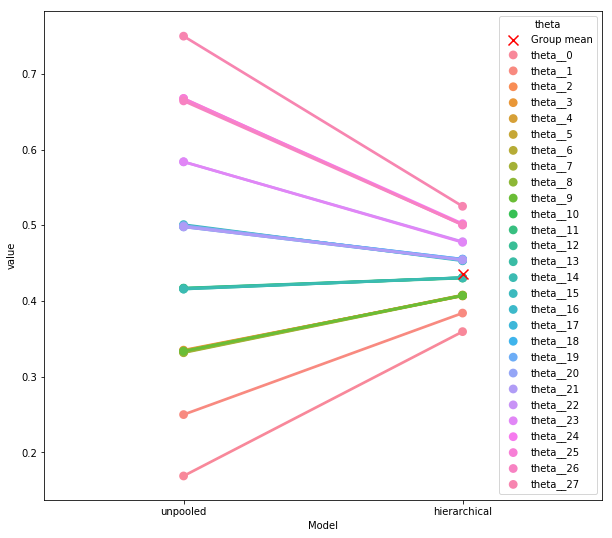

In [72]:
plt.figure(figsize=(10,9))
plt.scatter(
    1, 
    pm.summary(trace).iloc[0,0], 
    s=100, c='r', 
    marker='x', 
    zorder=999, 
    label='Group mean'
)
sns.pointplot(x='Model', y='value', hue='theta', data=df_shrinkage);

## Baseball abilities by position

In [85]:
baseball_df = pd.read_csv(
    '../data/BattingAverage.csv',
    usecols=[0,1,2,3],
    dtype={'PriPos': 'category'}
)

In [86]:
baseball_df['BatAv'] = baseball_df.Hits/baseball_df.AtBats

In [90]:
baseball_df.groupby('PriPos')['Hits', 'AtBats'].sum().pipe(lambda x: x.Hits/x.AtBats)

PriPos
1st Base        0.258851
2nd Base        0.255676
3rd Base        0.265036
Catcher         0.247404
Center Field    0.263513
Left Field      0.259077
Pitcher         0.129148
Right Field     0.263555
Shortstop       0.255186
dtype: float64

In [105]:
pripos_idx = baseball_df.PriPos.cat.codes.values
pripos_codes = baseball_df.PriPos.cat.categories
n_pripos = pripos_codes.size

# baseball_df contains one entry per player
n_players = baseball_df.index.size

In [108]:
with pm.Model() as model:
    
    omega = pm.Beta('omega', 1, 1)
    
    kappa_minus_2 = pm.Gamma('kappa_minus_2', 0.01, 0.01)
    
    kappa = pm.Deterministic(
        'kappa', 
        kappa + 2
    )
    
    omega_c = pm.Beta(
        'omega_c',
        alpha = omega * kappa_minus_2 + 1,
        beta = (1 - omega) * kappa_minus_2 + 1,
        shape = n_pripos
    )
    
    kappa_minus_2_c = pm.Gamma(
        'kappa_minus_2_c', 
        0.01, 
        0.01,
        shape=n_pripos
    )
    
    kappa_c = pm.Deterministic(
        'kappa_c', 
        kappa_c + 2,
    )
    
    theta = pm.Beta(
        'theta',
        alpha= omega_c[pripos_idx] * kappa_minus_2_c[pripos_idx] + 1,
        beta = (1 - omega_c[pripos_idx]) * kappa_minus_2_c[pripos_idx] + 1
    )
    
    y = pm.Bernoulli(
        'y',
        n=baseball_df.AtBats.values,
        p=theta,
        observed=baseball_df.BatAv
    )

TypeError: For compute_test_value, one input test value does not have the requested type.

The error when converting the test value to that variable type:
Wrong number of dimensions: expected 0, got 1 with shape (948,).

In [111]:
with pm.Model() as hierarchical_model2:
    # Hyper parameters
    omega = pm.Beta('omega', 1, 1)
    kappa_minus2 = pm.Gamma('kappa_minus2', 0.01, 0.01)
    kappa = pm.Deterministic('kappa', kappa_minus2 + 2)
    
    # Parameters for categories (Primary field positions)
    omega_c = pm.Beta('omega_c',
                       omega*(kappa-2)+1, (1-omega)*(kappa-2)+1,
                       shape = n_pripos)
    
    kappa_c_minus2 = pm.Gamma('kappa_c_minus2',
                              0.01, 0.01,
                              shape = n_pripos)
    kappa_c = pm.Deterministic('kappa_c', kappa_c_minus2 + 2)
        
    # Parameter for individual players
    theta = pm.Beta('theta',
                     omega_c[pripos_idx]*(kappa_c[pripos_idx]-2)+1,
                    (1-omega_c[pripos_idx])*(kappa_c[pripos_idx]-2)+1,
                     shape = n_players)
    
    y2 = pm.Binomial('y2', n=baseball_df.AtBats.values, p=theta, observed=baseball_df.Hits)

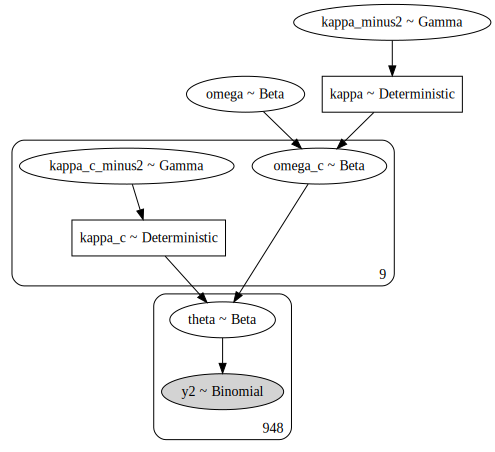

In [112]:
pm.model_to_graphviz(hierarchical_model2)

In [113]:
with hierarchical_model2:
    trace2 = pm.sample(3000, cores=16)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [theta, kappa_c_minus2, omega_c, kappa_minus2, omega]
Sampling 16 chains: 100%|██████████| 56000/56000 [03:49<00:00, 43.94draws/s] 
The acceptance probability does not match the target. It is 0.8968967877212864, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


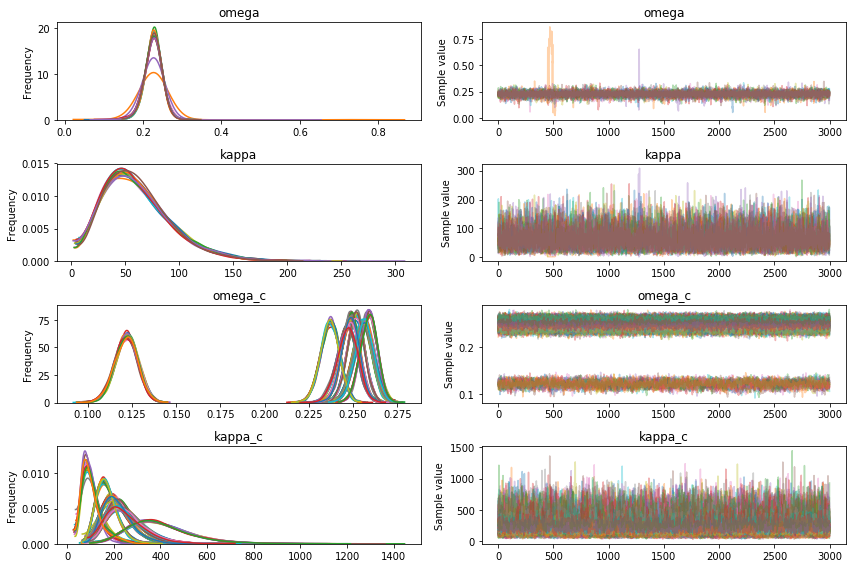

In [114]:
pm.traceplot(trace2, ['omega', 'kappa', 'omega_c', 'kappa_c']);


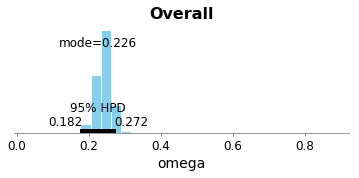

In [115]:
pm.plot_posterior(trace2['omega'], point_estimate='mode', color=color)
plt.title('Overall', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('omega', fontdict={'fontsize':14});


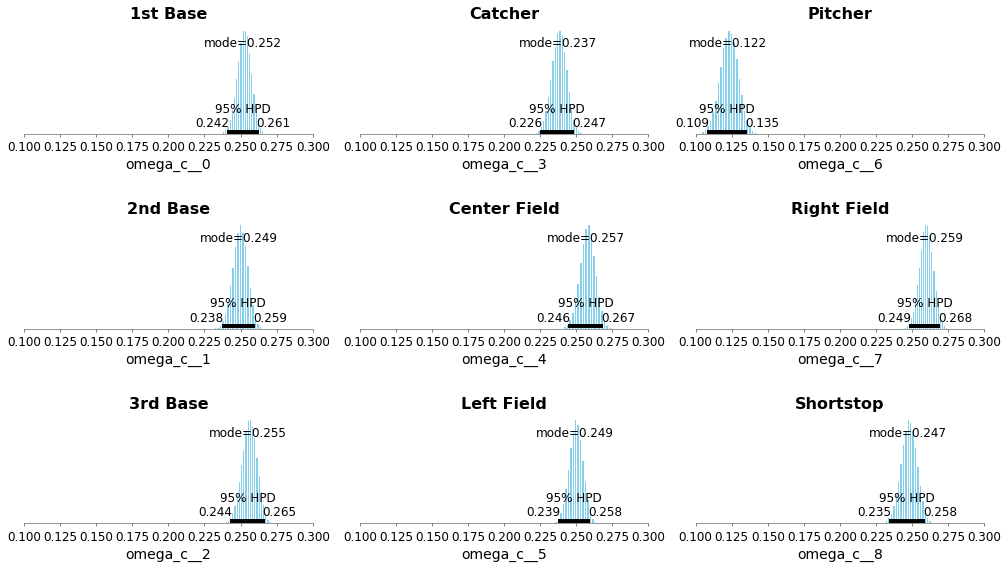

In [116]:
fig, axes = plt.subplots(3,3, figsize=(14,8))

for i, ax in enumerate(axes.T.flatten()):
    pm.plot_posterior(trace2['omega_c'][:,i], ax=ax, point_estimate='mode', color=color)
    ax.set_title(pripos_codes[i], fontdict={'fontsize':16, 'fontweight':'bold'})
    ax.set_xlabel('omega_c__{}'.format(i), fontdict={'fontsize':14})
    ax.set_xlim(0.10,0.30)

plt.tight_layout(h_pad=3)
